In [5]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

#### First, read in your dataframe of images with bounding box coordinates

In [2]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

### 1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
### 2. Visualize the image using plt.imshow


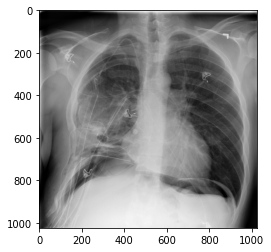

In [73]:
img_all = pydicom.dcmread('dicom_00023075_033.dcm')
img = img_all.pixel_array
plt.imshow(img, cmap='gray');

### 3. Plot a histogram of the image pixel intensity values


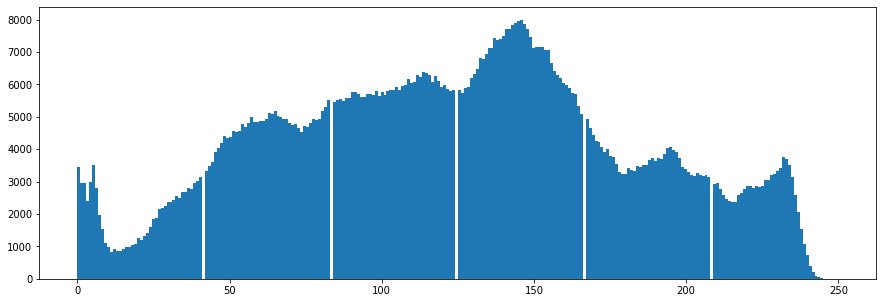

In [74]:
plt.figure(figsize=(15,5))
plt.hist(img.ravel(), bins=256)
plt.show()

### 4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:


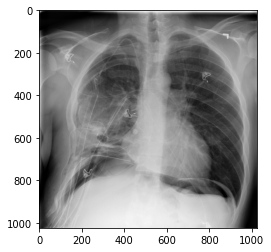

In [75]:
new_img = img.copy()
new_img = (img - np.mean(img))/np.std(img)

plt.imshow(new_img, cmap='gray');


### 5. Re-plot a histogram of the normalized intensity values


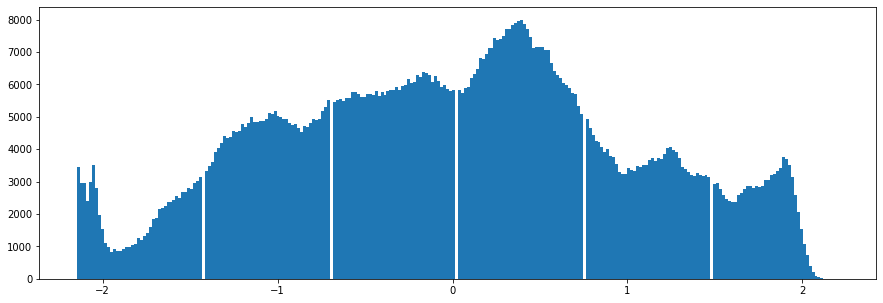

In [76]:
plt.figure(figsize=(15,5))
plt.hist(new_img.ravel(), bins=256)
plt.show()

### 6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow

In [70]:
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


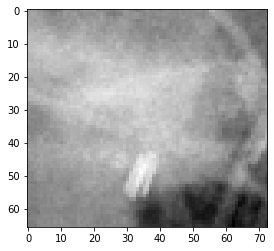

In [80]:
mass_orig = img[535:535+66, 240:240+73, ]
plt.imshow(mass_orig, cmap='gray')

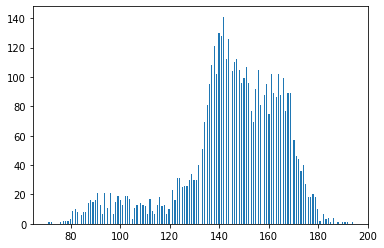

In [82]:
plt.hist(mass_orig.ravel(), bins=256);


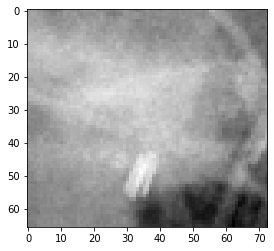

In [83]:
mass_norm = new_img[535:535+66, 240:240+73, ]
plt.imshow(mass_norm, cmap='gray')

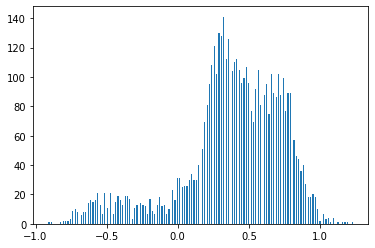

In [84]:
plt.hist(mass_norm.ravel(), bins=256);
